<img src="https://dgg-online.de/WordPress_01/wp-content/uploads/2022/10/20220928_000149_BlueSeis_Setup-scaled.jpg" align="right" alt="BlueSeis Image" width="500" height="100" />

# Analyse BlueSeis BSPF Events

Download Data of BlueSeis at Pinon Flat Observatory via IRIS. 

In [5]:
import os 
import obspy as obs
import numpy as np

In [6]:
def __request_data(seed, tbeg, tend):

    from obspy.clients.fdsn import Client

    client = Client("IRIS",)

    net, sta, loc, cha = seed.split(".")

    try:
        inventory = client.get_stations(network=net, 
                                         station=sta,
                                         starttime=tbeg,
                                         endtime=tend,
                                         level="response",
                                         )
    except:
        print("Failed to load inventory!")


    try:
        waveform = client.get_waveforms(network=net,
                                       station=sta,
                                       location=loc,
                                       channel=cha, 
                                       starttime=tbeg-60,
                                       endtime=tend+60,
                                       )

    except:
        print("Failed to load waveforms!")
        
    return waveform, inventory

## Configurations

In [13]:
config = {}

config['seed_blueseis'] = "PY.BSPF..HJ*"
config['seed_seismometer'] = "II.PFO.10.BH*"


## Event near PFO
config['tbeg'] = obs.UTCDateTime("2022-10-13 15:00:00")
config['tend'] = obs.UTCDateTime("2022-10-13 16:00:00")


## Load Data

In [14]:
py_bspf, py_bspf_inv = __request_data("PY.BSPF..HJ*", config['tbeg'], config['tend'])

3 Trace(s) in Stream:
PY.BSPF..HJ1 | 2022-10-13T14:59:00.004100Z - 2022-10-13T16:00:59.999100Z | 200.0 Hz, 744000 samples
PY.BSPF..HJ2 | 2022-10-13T14:59:00.004100Z - 2022-10-13T16:00:59.999100Z | 200.0 Hz, 744000 samples
PY.BSPF..HJ3 | 2022-10-13T14:59:00.004100Z - 2022-10-13T16:00:59.999100Z | 200.0 Hz, 744000 samples


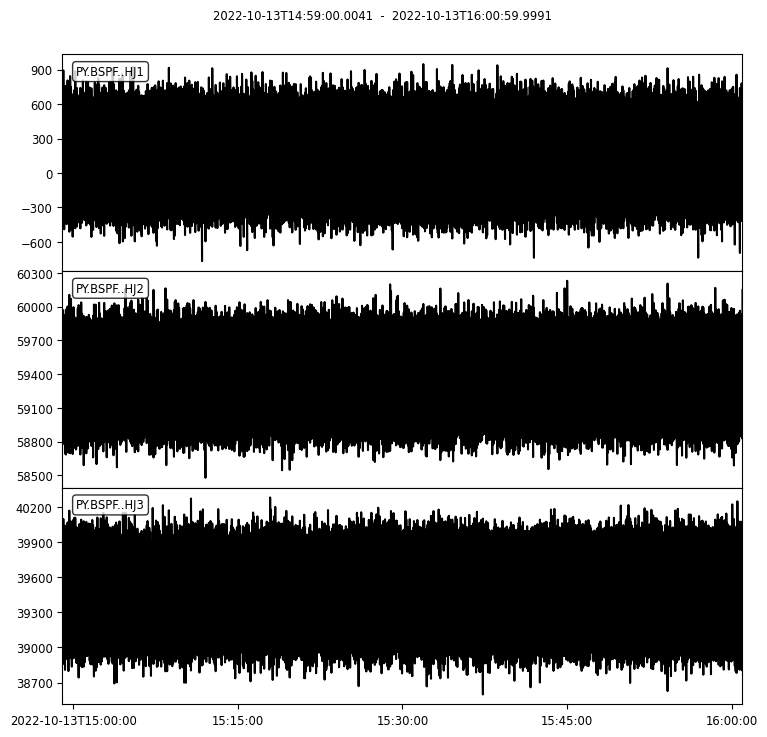

In [15]:
print(py_bspf)
py_bspf.plot(equal_scale=False);

In [12]:
# ii_pfo, ii_pfo_inv = __request_data(config['seed_seismometer'], config['tbeg'], config['tend'])

In [ ]:
# print(ii_pfo)
# ii_pfo.plot(equal_scale=False);